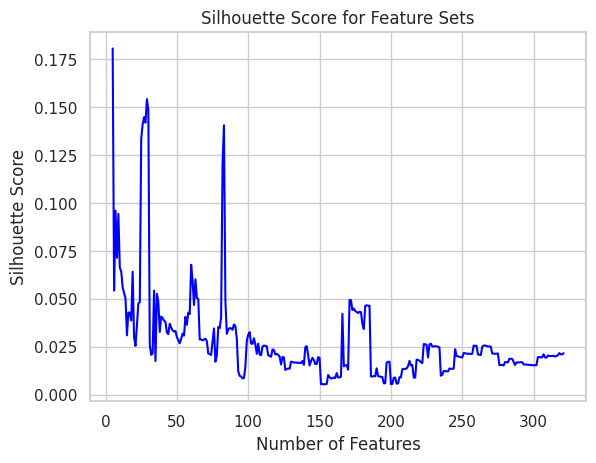

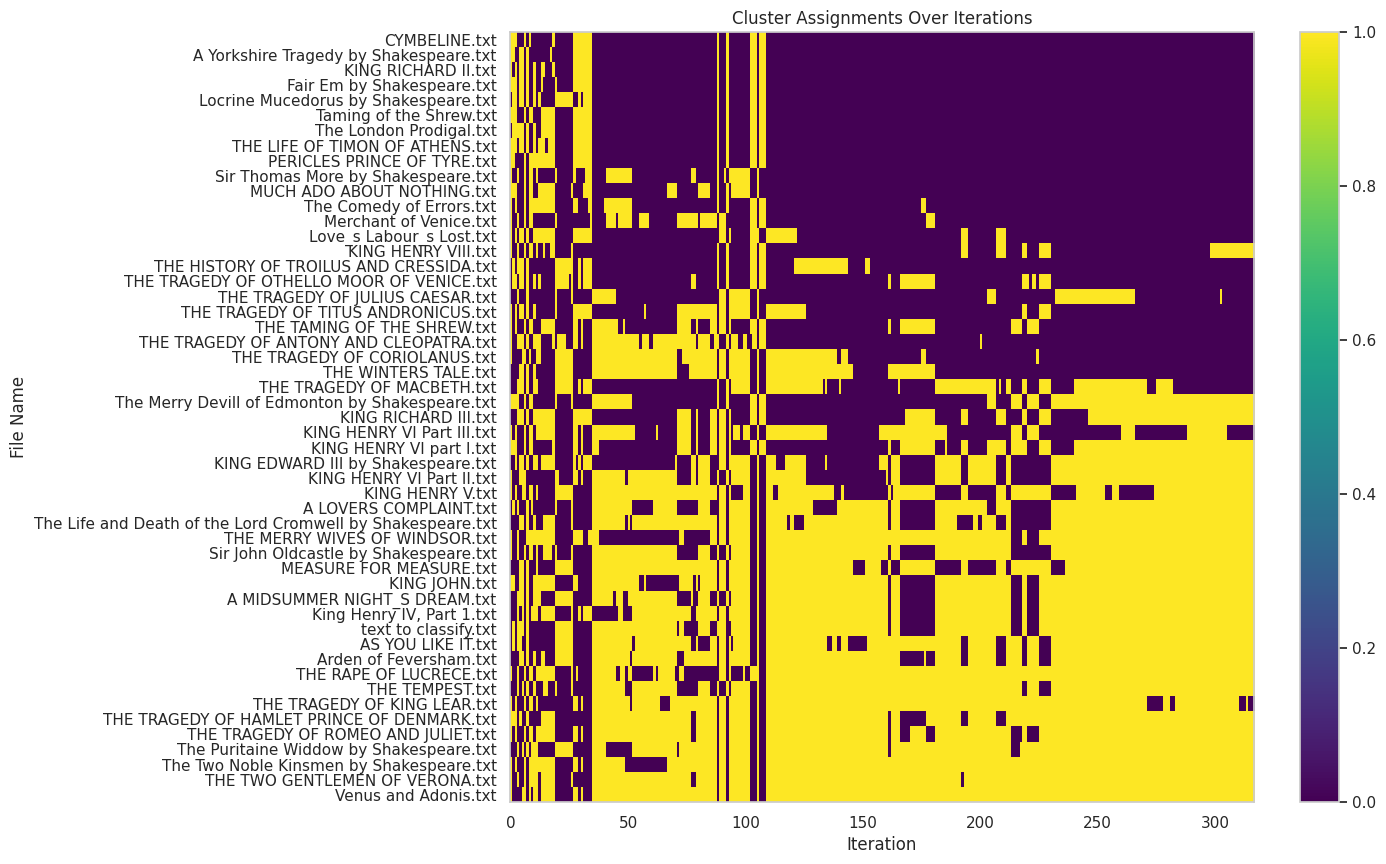

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

!pip install scikit-learn-extra

# Load data
df = pd.read_csv('/content/drive/MyDrive/Shakespeare Project - Share With Zeev/outputs/Copy of shakespeare_evaluation_results.csv')
data = df.select_dtypes(include=[np.number])  # Assuming non-numeric columns are not required for clustering
filenames = df.iloc[:, 0]

# Standard deviation filter
std_devs = np.std(data, axis=0)
data = data.loc[:, std_devs > 0]

# Normalize data
data_normalized = normalize(data, axis=0)

# Initialize variables for storing results
silhouette_scores = []
cl_all = np.zeros((data_normalized.shape[0], data_normalized.shape[1] - 5))

# Perform clustering on incrementally more features
for nn in range(5, data_normalized.shape[1]):
    current_data = data_normalized[:, :nn]
    current_data = normalize(current_data, axis=0)
    model = KMedoids(n_clusters=2, random_state=42).fit(current_data)
    cl_all[:, nn - 5] = model.labels_
    silhouette_avg = silhouette_score(current_data, model.labels_)
    silhouette_scores.append(silhouette_avg)

# Visualization of Silhouette scores
plt.figure()
plt.plot(range(5, 5 + len(silhouette_scores)), silhouette_scores, color='blue')
plt.xlabel('Number of Features')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Feature Sets')
plt.show()

# Create DataFrame for final cluster labels and filenames
final_clusters = cl_all[:, -1]  # Taking the last set of cluster labels
results_df = pd.DataFrame({
    'Filename': filenames,
    'Cluster': final_clusters
})

# Sort results by cluster label
sorted_results = results_df.sort_values(by='Cluster')
mean_cluster_labels = cl_all.mean(axis=1)

# Sort based on mean cluster labels
sorted_indices = np.argsort(mean_cluster_labels)
sorted_filenames = filenames[sorted_indices]
sorted_mean_labels = mean_cluster_labels[sorted_indices]

# Create a DataFrame to display sorted results
sorted_df = pd.DataFrame({
    'Filename': sorted_filenames,
    'MeanClusterLabel': sorted_mean_labels
})
# Visualize cluster assignments over iterations
plt.figure(figsize=(12, 10))
plt.imshow(cl_all[sorted_indices, :], aspect='auto', interpolation='none', cmap='viridis')
plt.colorbar()
plt.title('Cluster Assignments Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('File Name')
plt.yticks(range(len(filenames)), sorted_results['Filename'])  # Apply sorted filenames to y-axis
plt.grid(False)  # Remove grid lines inside the heatmap
plt.show()


<ipython-input-38-beda74d3d707>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='normalized_score', y='Filenames', data=df, palette="viridis")


Mean: 0.01633627450980392
Standard Deviation: 0.01981605064494783
Threshold: 0.05596837579969958


<ipython-input-38-beda74d3d707>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_anomaly_score', y='Filenames', data=df, palette="viridis")


Text(0, 0.5, 'Filenames')

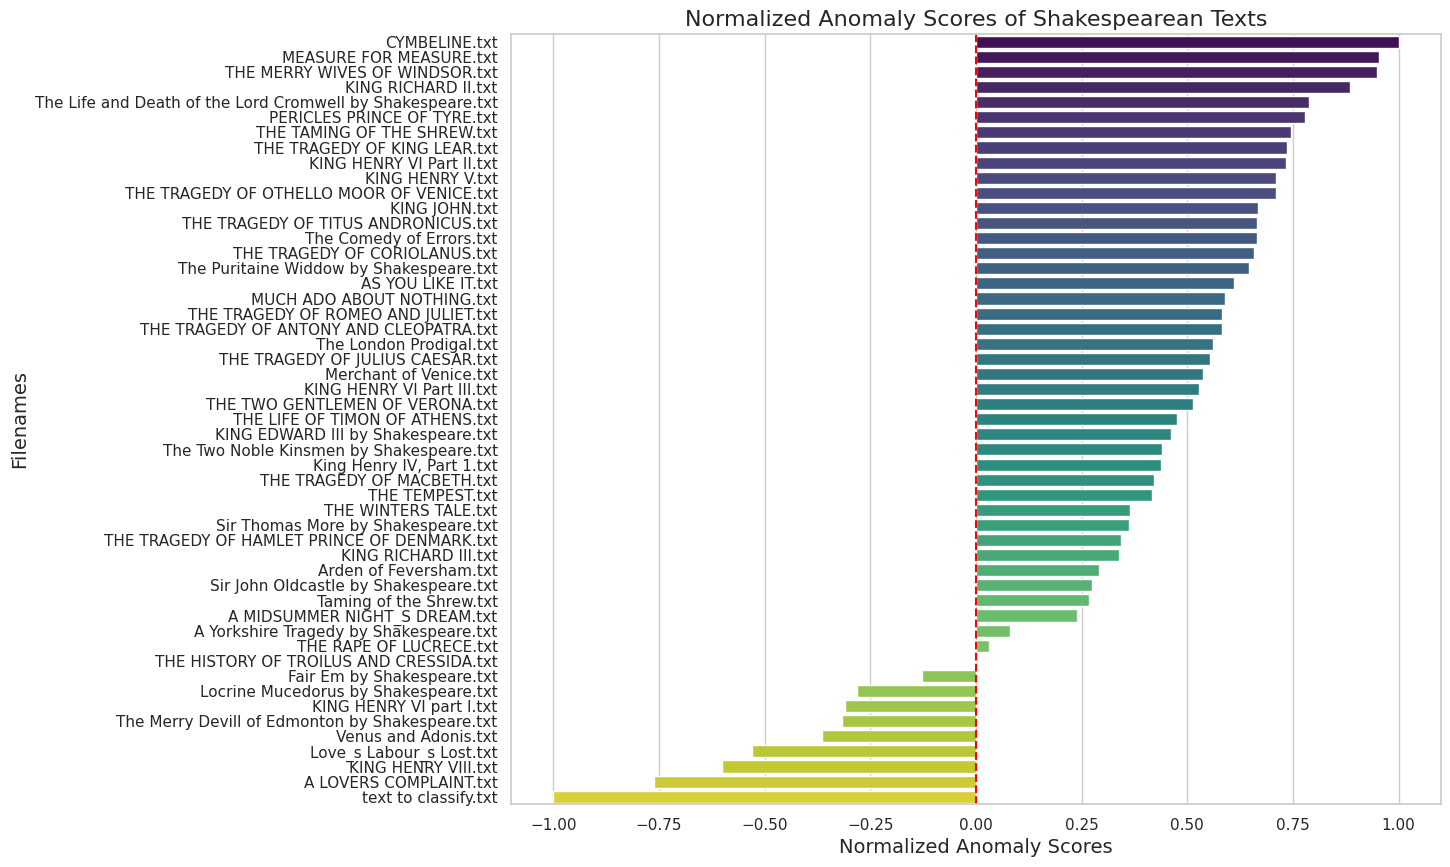

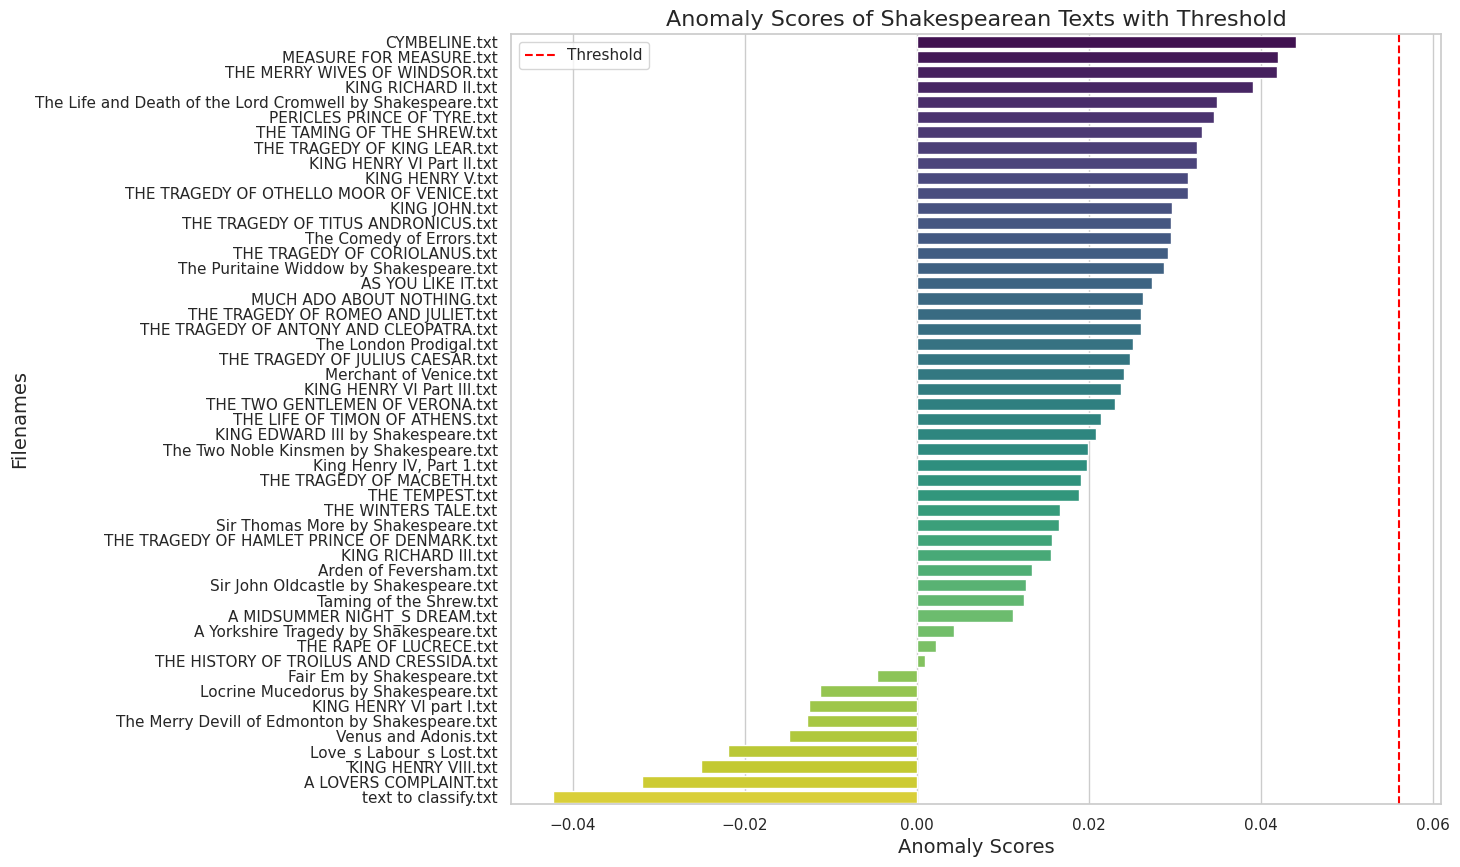

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given data
data = {
    'Filenames': [
        "CYMBELINE.txt", "MEASURE FOR MEASURE.txt", "THE MERRY WIVES OF WINDSOR.txt", "KING RICHARD II.txt",
        "The Life and Death of the Lord Cromwell by Shakespeare.txt", "PERICLES PRINCE OF TYRE.txt",
        "THE TAMING OF THE SHREW.txt", "THE TRAGEDY OF KING LEAR.txt", "KING HENRY VI Part II.txt", "KING HENRY V.txt",
        "THE TRAGEDY OF OTHELLO MOOR OF VENICE.txt", "KING JOHN.txt", "THE TRAGEDY OF TITUS ANDRONICUS.txt",
        "The Comedy of Errors.txt", "THE TRAGEDY OF CORIOLANUS.txt", "The Puritaine Widdow by Shakespeare.txt",
        "AS YOU LIKE IT.txt", "MUCH ADO ABOUT NOTHING.txt", "THE TRAGEDY OF ROMEO AND JULIET.txt",
        "THE TRAGEDY OF ANTONY AND CLEOPATRA.txt", "The London Prodigal.txt", "THE TRAGEDY OF JULIUS CAESAR.txt",
        "Merchant of Venice.txt", "KING HENRY VI Part III.txt", "THE TWO GENTLEMEN OF VERONA.txt",
        "THE LIFE OF TIMON OF ATHENS.txt", "KING EDWARD III by Shakespeare.txt", "The Two Noble Kinsmen by Shakespeare.txt",
        "King Henry IV, Part 1.txt", "THE TRAGEDY OF MACBETH.txt", "THE TEMPEST.txt", "THE WINTERS TALE.txt",
        "Sir Thomas More by Shakespeare.txt", "THE TRAGEDY OF HAMLET PRINCE OF DENMARK.txt", "KING RICHARD III.txt",
        "Arden of Feversham.txt", "Sir John Oldcastle by Shakespeare.txt", "Taming of the Shrew.txt",
        "A MIDSUMMER NIGHT_S DREAM.txt", "A Yorkshire Tragedy by Shakespeare.txt", "THE RAPE OF LUCRECE.txt",
        "THE HISTORY OF TROILUS AND CRESSIDA.txt", "Fair Em by Shakespeare.txt", "Locrine Mucedorus by Shakespeare.txt",
        "KING HENRY VI part I.txt", "The Merry Devill of Edmonton by Shakespeare.txt", "Venus and Adonis.txt",
        "Love_s Labour_s Lost.txt", "KING HENRY VIII.txt", "A LOVERS COMPLAINT.txt", "text to classify.txt"
    ],
    'mean_anomaly_score': [
        0.044012, 0.041962, 0.041839, 0.039057, 0.034858, 0.034474, 0.033066, 0.032581, 0.032561, 0.031516,
        0.031486, 0.029611, 0.029565, 0.029510, 0.029210, 0.028714, 0.027243, 0.026282, 0.026003, 0.025968,
        0.025094, 0.024712, 0.023992, 0.023667, 0.023013, 0.021412, 0.020758, 0.019824, 0.019725, 0.019019,
        0.018791, 0.016573, 0.016448, 0.015624, 0.015506, 0.013407, 0.012670, 0.012402, 0.011133, 0.004338,
        0.002199, 0.000896, -0.004648, -0.011284, -0.012531, -0.012811, -0.014878, -0.021991, -0.025119,
        -0.031994, -0.042315
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Normalize the 'mean_anomaly_score' to [-1, 1]
min_score = df['mean_anomaly_score'].min()
max_score = df['mean_anomaly_score'].max()
df['normalized_score'] = 2 * ((df['mean_anomaly_score'] - min_score) / (max_score - min_score)) - 1

# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Plotting the anomaly scores of each text
plt.figure(figsize=(12, 10))
sns.barplot(x='normalized_score', y='Filenames', data=df, palette="viridis")

plt.title('Normalized Anomaly Scores of Shakespearean Texts', fontsize=16)
plt.xlabel('Normalized Anomaly Scores', fontsize=14)
plt.ylabel('Filenames', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--')  # Adding a vertical line at score 0 for reference
# plt.show()

# Calculate mean and standard deviation of anomaly scores
mean_score = df['mean_anomaly_score'].mean()
std_dev = df['mean_anomaly_score'].std()

# Define the threshold as, for example, 2 standard deviations above the mean
threshold = mean_score + 2 * std_dev

print("Mean:", mean_score)
print("Standard Deviation:", std_dev)
print("Threshold:", threshold)

# Plotting the anomaly scores of each text with threshold
plt.figure(figsize=(12, 10))
sns.barplot(x='mean_anomaly_score', y='Filenames', data=df, palette="viridis")
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title('Anomaly Scores of Shakespearean Texts with Threshold', fontsize=16)
plt.xlabel('Anomaly Scores', fontsize=14)
plt.ylabel('Filenames', fontsize=14)
# plt.show()



In [ ]:
!pip install adjustText

import json
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import drive
import matplotlib.pyplot as plt
from pathlib import Path
import os
import tensorflow as tf
from sklearn.ensemble import IsolationForest
import numpy as np


drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Load the imposter pairs from a JSON file
def load_imposters(file_path):
    with open(file_path, 'r') as file:
        imposter_pairs = json.load(file)
    return imposter_pairs

# Load the current pair index from a JSON file
def load_current_index(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        current_index = data['current_pair_index']
    return current_index



# Function to update the second dropdown based on the first dropdown's choice
def update_dropdown2(*args):
    selected_imposter1 = dropdown_imposter1.value
    # Filter pairs up to the current index
    filtered_pairs = [pair for pair in imposters[:current_index+1] if selected_imposter1 in pair]
    # Find all partners of the selected writer
    partners = [pair[0] if pair[1] == selected_imposter1 else pair[1] for pair in filtered_pairs]
    dropdown_imposter2.options = partners

In [ ]:
 # Define a function to clean text
def clean_text(text):
        if not tf.is_tensor(text):
            text = tf.constant(text, dtype=tf.string)
        # Normalize text by converting to lowercase
        text = tf.strings.lower(text)
        # Remove '\n', '\r', and '\t'
        text = tf.strings.regex_replace(text, r"[\n\r\t]", " ")
        # Remove excessive whitespace
        text = tf.strings.regex_replace(text, r"\s+", " ")
        # Optionally, remove numbers if they're deemed irrelevant. Uncomment if needed.
        text = tf.strings.regex_replace(text, r"\d+", " ")
        # Remove special characters except apostrophes and periods (which might be relevant for sentence boundary detection)
        text = tf.strings.regex_replace(text, r"[^a-z0-9'. ]", " ")
        # Trim leading and trailing whitespace
        text = tf.strings.strip(text)
        return text.numpy().decode('utf-8')  # Convert from tensor to string

def load_texts_from_directory(directory_path, aggregate_by_subfolder=True):
    """
    Load texts from files in the given directory, optionally aggregating them by subfolder or by filenames if no subfolders exist.

    Parameters:
    - directory_path (str): Path to the directory containing text files or subdirectories with text files.
    - aggregate_by_subfolder (bool): If True, returns a dictionary where each key is a subfolder name (author),
      and its value is a list of text contents from that author. If no subfolders are present, or if False,
      returns a dictionary with filenames as keys and text contents as values.

    Returns:
    - texts_dictionary (dict): Depending on `aggregate_by_subfolder` and the presence of subfolders, returns a dictionary
      with either subfolder names or filenames as keys and lists of text contents as values.
    """
    texts_dictionary = {}
    subfolders_exist = any(os.path.isdir(os.path.join(directory_path, i)) for i in os.listdir(directory_path))

    # Determine whether to aggregate by subfolder or directly by filenames
    aggregate_by = aggregate_by_subfolder and subfolders_exist

    for root, dirs, files in os.walk(directory_path):
        # Break the loop if not aggregating by subfolders and the first directory walk is done
        if not aggregate_by and root != directory_path:
            break
        for name in files:
            filepath = os.path.join(root, name)
            try:
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()
            except UnicodeDecodeError:
                with open(filepath, 'r', encoding='iso-8859-1') as f:
                    text = f.read()
            key = os.path.basename(root) if aggregate_by else name
            if key not in texts_dictionary:
                texts_dictionary[key] = []
            texts_dictionary[key].append(text)
    return texts_dictionary


In [ ]:
def detect_outliers_with_isolation_forest(distance_matrix, filenames, num_trees=100, outlier_threshold=0.2, percentile_threshold=90):
    # Calculate the sum of distances for each file (assuming each row corresponds to a file)
    distance_sums = np.sum(distance_matrix, axis=1)
    high_distance_indices = np.where(distance_sums > np.percentile(distance_sums, percentile_threshold))[0]

    # Isolation Forest for additional outlier detection
    model = IsolationForest(n_estimators=num_trees, contamination=outlier_threshold)
    model.fit(distance_matrix)
    is_outlier = model.predict(distance_matrix) == -1

    # Combine custom high distance detection with Isolation Forest results
    combined_outliers = np.zeros(len(filenames), dtype=bool)
    combined_outliers[high_distance_indices] = True  # Mark high distance files as outliers
    combined_outliers[is_outlier] = True  # Mark Isolation Forest detected outliers

    # Prepare scores just for visualization purposes (can be based on Isolation Forest decision function or distance sums)
    scores = -model.decision_function(distance_matrix)  # Negative scores to make higher values more 'outlying'

    return filenames, scores, combined_outliers, distance_sums

# def visualize_outliers(filenames, scores, is_outlier, distance_sums):
#     colors = ['red' if outlier else 'green' for outlier in is_outlier]
#     sizes = 100 * (scores - min(scores)) / (max(scores) - min(scores)) + 50  # Scale sizes based on scores

#     plt.figure(figsize=(18, 12))
#     scatter = plt.scatter(distance_sums, scores, color=colors, s=sizes, alpha=0.6)  # Use sizes to reflect the anomaly extent

#     for i, txt in enumerate(filenames):
#         if is_outlier[i]:  # Optionally annotate only outliers
#             plt.annotate(txt, (distance_sums[i], scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

#     plt.xlabel('Sum of Distances')
#     plt.ylabel('Outlier Score (Higher is more anomalous)')
#     plt.title('Outlier Detection Results')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

def visualize_outliers(filenames, scores, is_outlier, signal_values):
    colors = ['red' if outlier else 'green' for outlier in is_outlier]
    plt.figure(figsize=(18, 12))

    # Assuming 'signals' is a list or array of numerical values corresponding to each file
    scatter = plt.scatter(signal_values, scores, color=colors, alpha=0.6, s=100)

    for i, txt in enumerate(filenames):
        if is_outlier[i]:  # Optionally annotate only outliers to avoid clutter
            plt.annotate(txt, (signal_values[i], scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.xlabel('Signal Value')
    plt.ylabel('Outlier Score (Higher is more anomalous)')
    plt.title('Outlier Detection Results')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:

batch_factor = 16

# Path to the JSON files
path_imposters = '/content/drive/MyDrive/Shakespeare Project - Share With Zeev/metadata/imposters_pairs.json'
path_index = '/content/drive/MyDrive/Shakespeare Project - Share With Zeev/metadata/training_state.json'
saved_models_dir ='/content/drive/MyDrive/Shakespeare Project - Share With Zeev/saved_models'
shakespeare_dir = '/content/drive/MyDrive/Shakespeare Project - Share With Zeev/shakespeare'
output_dir = '/content/drive/MyDrive/Shakespeare Project - Share With Zeev/output'
shakespeare_texts_dictionary = load_texts_from_directory(shakespeare_dir, aggregate_by_subfolder=False)
shakespeare_texts_list = [text for texts in shakespeare_texts_dictionary.values() for text in texts]
shakespare_filenames = list(shakespeare_texts_dictionary.keys())
shakespeare_preprocessed_texts = [clean_text(text) for text in shakespeare_texts_list]

# Load data
imposters = load_imposters(path_imposters)
current_index = load_current_index(path_index)

# Filter imposters up to the current index
valid_imposters = imposters[:current_index+1]

# Extract all unique writers from pairs up to the current index
all_writers = set()
for pair in valid_imposters:
    all_writers.update(pair)
all_writers = sorted(list(all_writers))

# Create dropdowns for selecting imposter pairs
dropdown_imposter1 = widgets.Dropdown(options=all_writers, description='Imposter 1:')
dropdown_imposter2 = widgets.Dropdown(description='Imposter 2:')

# Update the second dropdown when the first one changes
dropdown_imposter1.observe(update_dropdown2, 'value')

# Button to run the model
button_run = widgets.Button(description='Run Model', icon='check')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        # Identify the iteration of the selected pair
        selected_pair = [dropdown_imposter1.value, dropdown_imposter2.value]
        if selected_pair in valid_imposters:
            iteration_number = valid_imposters.index(selected_pair)  # Making it one-based
        else:
            # This might occur if the pair is not in the list or if the order is reversed in your pair list
            selected_pair_reversed = [dropdown_imposter2.value, dropdown_imposter1.value]
            if selected_pair_reversed in valid_imposters:
                iteration_number = valid_imposters.index(selected_pair_reversed)   # Making it one-based
            else:
                iteration_number = "Pair not found within the valid range."
        distance_results = np.load(f"{output_dir}/dist_mat_{iteration_number}.npy", allow_pickle=True)
        signal_results = np.load(f"{output_dir}/Signal_{iteration_number}.npy", allow_pickle=True).item()
        signal_values = [np.mean(values) for values in signal_results.values()]  # Example: Averaging signal chunks per file
        # Run the model
        print(f"Model executed with imposters: {dropdown_imposter1.value} and {dropdown_imposter2.value}")
        print(f"Iteration number: {iteration_number}")

        filenames, scores, is_outlier, distance_sums = detect_outliers_with_isolation_forest(distance_matrix=distance_results, filenames=shakespare_filenames, num_trees=100, outlier_threshold=0.2, percentile_threshold=90)
        # visualize_outliers(filenames, scores, is_outlier, distance_sums)
        visualize_outliers(filenames, scores, is_outlier, signal_values)

button_run.on_click(on_button_clicked)

# Display the widgets
display(dropdown_imposter1, dropdown_imposter2, button_run, output)


Dropdown(description='Imposter 1:', options=(' Arthur Ignatius Conan Doyle', 'Agatha Christie', 'Arthur C Clar…

Dropdown(description='Imposter 2:', options=(), value=None)

Button(description='Run Model', icon='check', style=ButtonStyle())

Output()